## Recommended Insights

In [1]:
import numpy as np
import pandas as pd

In [2]:
campaigns = pd.read_csv('dim_campaigns.csv')
products = pd.read_csv('dim_products.csv')
stores = pd.read_csv('dim_stores.csv')
events = pd.read_csv('fact_events.csv')

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Validating campaigns data**

In [4]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    2 non-null      object
 1   campaign_name  2 non-null      object
 2   start_date     2 non-null      object
 3   end_date       2 non-null      object
dtypes: object(4)
memory usage: 192.0+ bytes


**Changing data type of date**

In [5]:
campaigns['start_date'] = pd.to_datetime(campaigns['start_date'])
campaigns['end_date'] = pd.to_datetime(campaigns['end_date'])

In [6]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    2 non-null      object        
 1   campaign_name  2 non-null      object        
 2   start_date     2 non-null      datetime64[ns]
 3   end_date       2 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 192.0+ bytes


In [7]:
campaigns

,campaign_id,campaign_name,start_date,end_date
0,CAMP_DIW_01,Diwali,2023-12-11,2023-11-18
1,CAMP_SAN_01,Sankranti,2024-10-01,2024-01-16


**Validating products data**

In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  15 non-null     object
 1   product_name  15 non-null     object
 2   category      15 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


In [9]:
products.head()

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care


**Validating stores data**

In [10]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   store_id  50 non-null     object
 1   city      50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


In [11]:
stores.head()

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore


**Validating events data**

In [12]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   event_id                     1500 non-null   object
 1   store_id                     1500 non-null   object
 2   campaign_id                  1500 non-null   object
 3   product_code                 1500 non-null   object
 4   base_price                   1500 non-null   int64 
 5   promo_type                   1500 non-null   object
 6   quantity_sold(before_promo)  1500 non-null   int64 
 7   quantity_sold(after_promo)   1500 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 93.9+ KB


### Store Performance Analysis

* Which are the top 10 stores in terms of Incremental Revenue (IR) generated from the promotions?


In [13]:
events['total_rev_before_promo'] = events['base_price'] * events['quantity_sold(before_promo)']
events['total_qty_after_promo'] = np.where(events['promo_type'] == 'BOGOF', 2 *  events['quantity_sold(after_promo)'], events['quantity_sold(after_promo)'])
events['discount'] = np.where(events['promo_type'] == '50% OFF', 0.50 * events['base_price'] * events['total_qty_after_promo'],np.where(events['promo_type'] == '25% OFF', 0.25 * events['base_price'] * events['total_qty_after_promo'],np.where(events['promo_type'] == '33% OFF', 0.33 * events['base_price'] * events['total_qty_after_promo'],np.where(events['promo_type'] == 'BOGOF', 0.50 * events['base_price'] * events['total_qty_after_promo'],  500 * events['total_qty_after_promo']))))
events['total_rev_after_promo'] = (events['base_price'] * events['total_qty_after_promo']) - events['discount']
event_store = events.groupby('store_id')[['total_rev_before_promo','total_rev_after_promo']].sum().reset_index()
event_store['IR'] = event_store['total_rev_after_promo'] - event_store['total_rev_before_promo']
event_store.sort_values(by='IR',ascending=False).head(10)

,store_id,total_rev_before_promo,total_rev_after_promo,IR
38,STMYS-1,3539283,8458596.54,4919313.54
19,STCHE-4,3556860,8384890.03,4828030.03
0,STBLR-0,3401065,8160688.65,4759623.65
7,STBLR-7,3355236,8072823.33,4717587.33
22,STCHE-7,3257935,7905660.72,4647725.72
6,STBLR-6,3404012,8014232.29,4610220.29
18,STCHE-3,3223142,7631792.33,4408650.33
40,STMYS-3,3223037,7625328.98,4402291.98
21,STCHE-6,3567987,7603832.71,4035845.71
3,STBLR-3,3360712,7303155.40,3942443.40


* Which are the bottom 10 stores when it comes to Incremental Sold Units (ISU) during the promotional period?


In [14]:
events['ISU'] = events['total_qty_after_promo'] - events['quantity_sold(before_promo)']
events.groupby('store_id')[['ISU']].sum().reset_index().sort_values(by='ISU',ascending=True).head(10)

,store_id,ISU
34,STMLR-0,3978
48,STVSK-3,4553
49,STVSK-4,4988
42,STTRV-1,5072
44,STVJD-1,5302
41,STTRV-0,5306
36,STMLR-2,5374
35,STMLR-1,5481
43,STVJD-0,5870
14,STCBE-4,5942


* How does the performance of stores vary by city?

In [15]:
city_rev = pd.merge(events,stores,on='store_id').groupby('city')[['total_rev_after_promo','total_rev_before_promo']].sum().reset_index()
city_rev

,city,total_rev_after_promo,total_rev_before_promo
0,Bengaluru,71174628.79,32943279
1,Chennai,56999698.16,26286454
2,Coimbatore,25861276.99,12235954
3,Hyderabad,45391373.49,22678681
4,Madurai,22729208.01,10331552
5,Mangalore,10010135.20,5034816
6,Mysuru,26843127.28,12946287
7,Trivandrum,6697781.51,3201786
8,Vijayawada,7633080.12,3587937
9,Visakhapatnam,22266334.04,11454442


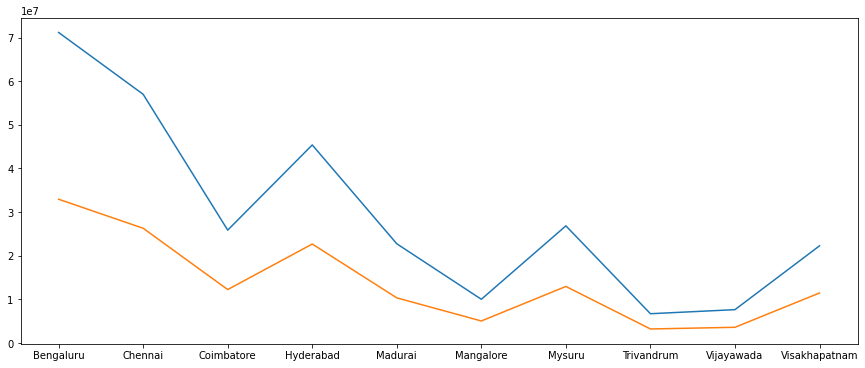

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))


plt.plot(city_rev['city'], city_rev['total_rev_after_promo'])
plt.plot(city_rev['city'], city_rev['total_rev_before_promo'])

plt.show()

* Are there any common characteristics among the top-performing stores that could be leveraged across other stores?

In [17]:
city_store_rev = pd.merge(events,stores,on='store_id').groupby(['city','store_id'])[['total_rev_after_promo','total_rev_before_promo']].sum().reset_index()
city_store_rev.sort_values(by='total_rev_after_promo').head()

,city,store_id,total_rev_after_promo,total_rev_before_promo
34,Mangalore,STMLR-0,2846342.24,1630896
42,Trivandrum,STTRV-1,3207346.09,1518180
41,Trivandrum,STTRV-0,3490435.42,1683606
35,Mangalore,STMLR-1,3514173.88,1646250
36,Mangalore,STMLR-2,3649619.08,1757670


**Promotion Type Analysis:**


* What are the top 2 promotion types that resulted in the highest Incremental Revenue?

In [18]:
events['IR'] = events['total_rev_after_promo'] - events['total_rev_before_promo']
events.groupby('promo_type')[['IR']].sum().reset_index().sort_values(by='IR',ascending=False).head(2)

,promo_type,IR
3,500 Cashback,91053000.00
4,BOGOF,69316990.00


* What are the bottom 2 promotion types in terms of their impact on Incremental Sold Units?

In [19]:
events.groupby('promo_type')[['ISU']].sum().reset_index().sort_values(by='ISU',ascending=True).head(2)

,promo_type,ISU
0,25% OFF,-5717
2,50% OFF,6931


* Is there a significant difference in the performance of discount-based promotions versus BOGOF (Buy One Get One Free) or cashback promotions?


In [59]:
# The IR and ISU value is higher for BOGOF (Buy One Get One Free) or cashback promotions, instead of discount-based promotions.

* Which promotions strike the best balance between Incremental Sold Units and maintaining healthy margins?

<AxesSubplot:xlabel='promo_type'>

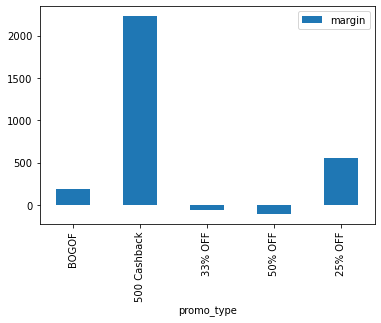

In [60]:
promo = events.groupby('promo_type')[['IR','ISU']].sum().reset_index().sort_values(by='ISU',ascending=False)
promo['margin'] = promo['IR']/promo['ISU']
promo.sort_values(by='margin',ascending=False)


promo.plot(kind='bar',x='promo_type',y='margin')

**Product and Category Analysis:**

* Which product categories saw the most significant lift in sales from the promotions?

In [62]:
pro_cat = pd.merge(events,products,on='product_code',how='inner')
pro_cat.groupby('category')[['total_rev_after_promo']].sum().reset_index().sort_values(by='total_rev_after_promo',ascending=False)

,category,total_rev_after_promo
0,Combo1,157950000.00
1,Grocery & Staples,76984739.84
2,Home Appliances,34633500.00
3,Home Care,24411661.25
4,Personal Care,1626742.50


* Are there specific products that respond exceptionally well or poorly to promotions?

In [63]:
events.groupby('product_code')[['IR','ISU']].sum().reset_index().sort_values(by='IR',ascending=False)

,product_code,IR,ISU
14,P15,91053000.00,40881
13,P14,17561340.00,40902
3,P04,17363475.00,118030
7,P08,12917450.00,25913
2,P03,8192769.00,104354
12,P13,7589050.00,51611
6,P07,3517500.00,28042
4,P05,-111278.75,-777
9,P10,-137752.50,1317
11,P12,-159836.00,2562


* What is the correlation between product category and promotion type effectiveness?

In [64]:
pro_cat2 = pro_cat.groupby(['category','promo_type'])[['IR','ISU']].sum().reset_index()
pro_cat2

,category,promo_type,IR,ISU
0,Combo1,500 Cashback,91053000.00,40881
1,Grocery & Staples,25% OFF,-2175406.00,-3474
2,Grocery & Staples,33% OFF,-1563356.16,27255
3,Grocery & Staples,BOGOF,27731650.00,225858
4,Home Appliances,BOGOF,25150390.00,92513
5,Home Care,25% OFF,-880273.75,-1512
6,Home Care,BOGOF,16434950.00,53955
7,Personal Care,25% OFF,-118835.00,-731
8,Personal Care,50% OFF,-726663.50,6931


In [65]:
pro_cat.groupby('category')['IR'].corr(pro_cat['promo_type'].astype('category').cat.codes)

category
Combo1                NaN
Grocery & Staples    0.85
Home Appliances       NaN
Home Care            0.73
Personal Care       -0.40
Name: IR, dtype: float64

In [66]:
pro_cat.groupby('category')['ISU'].corr(pro_cat['promo_type'].astype('category').cat.codes)

category
Combo1               NaN
Grocery & Staples   0.91
Home Appliances      NaN
Home Care           0.91
Personal Care       0.74
Name: ISU, dtype: float64

## Business Requests

1. Provide a list of products with a base price greater than 500 and that are featured in promo type of 'BOGOF' (Buy One Get One Free). This information will help us identify high-value products that are currently being heavily discounted, which can be useful for evaluating our pricing and promotion strategies.

In [67]:
events[(events['base_price'] > 500) & (events['promo_type'] == 'BOGOF')]['product_code'].unique()

pro = events[(events['base_price'] > 500) & (events['promo_type'] == 'BOGOF')][['product_code','base_price']].drop_duplicates()
pd.merge(products, pro,on='product_code', how='inner')

,product_code,product_name,category,base_price
0,P14,Atliq_waterproof_Immersion_Rod,Home Appliances,1020
1,P08,Atliq_Double_Bedsheet_set,Home Care,1190


2. Generate a report that provides an overview of the number of stores in each city. The results will be sorted in descending order of store counts, allowing us to identify the cities with the highest store presence. The report includes two essential fields: city and store count, which will assist in optimizing our retail operations.

In [68]:
store_city = pd.merge(events,stores,on='store_id',how='inner')
store_city.groupby('city').agg(count_of_stores=('store_id','nunique')).reset_index().sort_values(by='count_of_stores',ascending=False)

,city,count_of_stores
0,Bengaluru,10
1,Chennai,8
3,Hyderabad,7
2,Coimbatore,5
9,Visakhapatnam,5
4,Madurai,4
6,Mysuru,4
5,Mangalore,3
7,Trivandrum,2
8,Vijayawada,2


3. Generate a report that displays each campaign along with the total revenue generated before and after the campaign? The report includes three key fields: campaign_name, total_revenue (before_promotion), total_revenue(after_promotion). This report should help in evaluating the financial impact of our promotional campaigns. (Display the values in millions)

In [69]:
events['total_rev_before_promo'] = events['base_price'] * events['quantity_sold(before_promo)']
events['total_qty_after_promo'] = np.where(events['promo_type'] == 'BOGOF', 2 *  events['quantity_sold(after_promo)'], events['quantity_sold(after_promo)'])
events['discount'] = np.where(events['promo_type'] == '50% OFF', 0.50 * events['base_price'] * events['total_qty_after_promo'],np.where(events['promo_type'] == '25% OFF', 0.25 * events['base_price'] * events['total_qty_after_promo'],np.where(events['promo_type'] == '33% OFF', 0.33 * events['base_price'] * events['total_qty_after_promo'],np.where(events['promo_type'] == 'BOGOF', 0.50 * events['base_price'] * events['total_qty_after_promo'],  500 * events['total_qty_after_promo']))))
events['total_rev_after_promo'] = (events['base_price'] * events['total_qty_after_promo']) - events['discount']

event_camp = pd.merge(events,campaigns,on='campaign_id',how='inner')
event_camp.groupby('campaign_name')[['total_rev_before_promo','total_rev_after_promo']].sum().reset_index()

,campaign_name,total_rev_before_promo,total_rev_after_promo
0,Diwali,82573759,171459776.98
1,Sankranti,58127429,124146866.61


4. Produce a report that calculates the Incremental Sold Quantity (ISU%) for each category during the Diwali campaign. Additionally, provide rankings for the categories based on their ISU%. The report will include three key fields: category, isu%, and rank order. This information will assist in assessing the category-wise success and impact of the Diwali campaign on incremental sales.
Note: ISU% (Incremental Sold Quantity Percentage) is calculated as the percentage increase/decrease in quantity sold (after promo) compared to quantity sold (before promo)

In [70]:
events_cat = pd.merge(events,products,on='product_code',how='inner')
events_cat = events_cat[events_cat['campaign_id'] == 'CAMP_DIW_01']

cat_isu = events_cat.groupby('category')[['quantity_sold(before_promo)','total_qty_after_promo']].sum().reset_index()
cat_isu['ISU'] = cat_isu['total_qty_after_promo'] - cat_isu['quantity_sold(before_promo)']
cat_isu['ISU%'] = 100*(cat_isu['total_qty_after_promo'] - cat_isu['quantity_sold(before_promo)'])/cat_isu['quantity_sold(before_promo)']
cat_isu.sort_values(by='ISU%',ascending=False).round(2)

,category,quantity_sold(before_promo),total_qty_after_promo,ISU,ISU%
2,Home Appliances,5230,36006,30776,588.45
3,Home Care,13326,40396,27070,203.14
0,Combo1,16791,50769,33978,202.36
4,Personal Care,16843,22074,5231,31.06
1,Grocery & Staples,58129,68620,10491,18.05


5. Create a report featuring the Top 5 products, ranked by Incremental Revenue Percentage (IR%), across all campaigns. The report will provide essential information including product name, category, and ir%. This analysis helps identify the most successful products in terms of incremental revenue across our campaigns, assisting in product optimization.

In [71]:
events_prod = pd.merge(events,products,on='product_code',how='inner')
events_prod_ir = events_prod.groupby(['product_name','category'])[['total_rev_before_promo','total_rev_after_promo']].sum().reset_index()
events_prod_ir['IR'] = events_prod_ir['total_rev_after_promo'] - events_prod_ir['total_rev_before_promo']
events_prod_ir['IR%'] = 100*(events_prod_ir['total_rev_after_promo'] - events_prod_ir['total_rev_before_promo'])/events_prod_ir['total_rev_before_promo']
events_prod_ir.sort_values(by='IR%',ascending=False).head(5)

,product_name,category,total_rev_before_promo,total_rev_after_promo,IR,IR%
14,Atliq_waterproof_Immersion_Rod,Home Appliances,6597360,24158700.00,17561340.00,266.19
7,Atliq_High_Glo_15W_LED_Bulb,Home Appliances,2885750,10474800.00,7589050.00,262.98
4,Atliq_Double_Bedsheet_set,Home Care,5001570,17919020.00,12917450.00,258.27
2,Atliq_Curtains,Home Care,1377600,4895100.00,3517500.00,255.34
5,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,10851800,28215275.00,17363475.00,160.01


------